In [11]:
%run functions.ipynb
from time import perf_counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Wielkość populacji
x = 100
# Liczba genów osobnika
n = 0
# Inicjowanie osobnika zerami (w przypadku tych zadan nie ma sensu)
start_wth_zeros = False
# Pradopodobieństwo mutacji
p_mutate = 0.2
# Zakończ, jeśli wynik najlepszego osobnika nie zmienił się od ... iteracji.
end_optim=100

In [3]:
data = pd.DataFrame(columns=['Czas','Wynik','Sekwencyjny',
                             'Funkcja','Liczba genów',
                             'Liczba procesów'])
iteracje = 10
ns = [2,10,20,50,100]

## Sekwencyjny

In [4]:
def time_it(n, func, iteracje=10):
    best_scores = []
    times = []
    for _ in range(iteracje):
        t_start = perf_counter()
        population = initial_pop_generation(x,n,start_wth_zeros,min_value_n,max_value_n)
        best_gen, best_score,_,_ = optimize(population,x,n,func, min_or_max,end_optim,p_mutate)
        t_stop = perf_counter()
        best_scores.append(round(best_score,2))
        times.append(t_stop-t_start)
    
    time = round(sum(times)/len(times),2)
    score = np.mean(best_scores)
    print('Sredni czas: ', time)
    print('Srednia ocena:', score)

    if func==func1:
        function = 1
    else:
        function = 2
    
    result = [time,score,True,function,n,np.NaN]
    
    return result

### Funkcja 1 

In [5]:
# Funkcja oceny
function = func1
# Cel (min/max)
min_or_max='min'
# Minimalna wartość genu
min_value_n = -40
# Maksymalna wartość genu
max_value_n = 40

In [6]:
for n in ns:
    print('Liczba genów: ', n)
    result = time_it(n,func1)
    data.loc[len(data)] = result

Liczba genów:  2
Sredni czas:  0.41
Srednia ocena: 0.0
Liczba genów:  10
Sredni czas:  0.69
Srednia ocena: 0.0
Liczba genów:  20
Sredni czas:  1.32
Srednia ocena: 0.0
Liczba genów:  50
Sredni czas:  3.6
Srednia ocena: 0.24
Liczba genów:  100
Sredni czas:  6.33
Srednia ocena: 1.177


In [7]:
data.head()

,Czas,Wynik,Sekwencyjny,Funkcja,Liczba genów,Liczba procesów
0,0.41,0.000,True,1,2,NaN
1,0.69,0.000,True,1,10,NaN
2,1.32,0.000,True,1,20,NaN
3,3.60,0.240,True,1,50,NaN
4,6.33,1.177,True,1,100,NaN


### Funkcja 2

In [8]:
# Funkcja oceny
function = func2
# Cel (min/max)
min_or_max='max'
# Minimalna wartość genu
min_value_n = -30
# Maksymalna wartość genu
max_value_n = 30

In [9]:
for n in ns:
    print('Liczba genów: ', n)
    result = time_it(n,func2)
    data.loc[len(data)] = result

Liczba genów:  2
Sredni czas:  0.42
Srednia ocena: 0.0
Liczba genów:  10
Sredni czas:  0.62
Srednia ocena: 0.0
Liczba genów:  20
Sredni czas:  1.08
Srednia ocena: 0.0
Liczba genów:  50
Sredni czas:  2.65
Srednia ocena: -1.552
Liczba genów:  100
Sredni czas:  5.65
Srednia ocena: -2.3899999999999997


In [10]:
data

,Czas,Wynik,Sekwencyjny,Funkcja,Liczba genów,Liczba procesów
0,0.41,0.000,True,1,2,NaN
1,0.69,0.000,True,1,10,NaN
2,1.32,0.000,True,1,20,NaN
3,3.60,0.240,True,1,50,NaN
4,6.33,1.177,True,1,100,NaN
5,0.42,0.000,True,2,2,NaN
6,0.62,0.000,True,2,10,NaN
7,1.08,0.000,True,2,20,NaN
8,2.65,-1.552,True,2,50,NaN
9,5.65,-2.390,True,2,100,NaN


## Multiprocessing

In [11]:
# Wielkość populacji
x = 100
# Liczba genów osobnika
n = 0
# Inicjowanie osobnika zerami (w przypadku tych zadan nie ma sensu)
start_wth_zeros = False
# Pradopodobieństwo mutacji
p_mutate = 0.2
# Zakończ, jeśli wynik najlepszego osobnika nie zmienił się od ... iteracji.
end_optim=100
# Liczba procesów
p_num=8
# Utworzenie managera procesów
manager = mp.Manager()

### Funkcja 1 

In [12]:
# Funkcja oceny
function = func1
# Cel (min/max)
min_or_max='min'
# Minimalna wartość genu
min_value_n = -40
# Maksymalna wartość genu
max_value_n = 40

In [13]:
for n in ns:
    best_scores = []
    times = []
    for _ in range(iteracje):
        t_start = perf_counter()
        best_score, best_gen = run_mp_alg(manager,x,n,function,min_or_max,
                            end_optim,p_mutate,p_num,
                            start_wth_zeros,min_value_n,max_value_n)
        t_stop = perf_counter()
        best_scores.append(round(best_score,2))
        times.append(t_stop-t_start)
    
    time = round(sum(times)/len(times),2)
    score = np.mean(best_scores)
    print('N:',n)
    print('Sredni czas: ', time)
    print('Srednia ocena:', score)
    
    result = [time,score,False,1,n,p_num]
    data.loc[len(data)] = result

N: 2
Sredni czas:  0.6
Srednia ocena: 0.0
N: 10
Sredni czas:  0.98
Srednia ocena: 0.0
N: 20
Sredni czas:  1.99
Srednia ocena: 0.0
N: 50
Sredni czas:  6.99
Srednia ocena: 0.148
N: 100
Sredni czas:  11.55
Srednia ocena: 0.9880000000000002


In [14]:
data.head()

,Czas,Wynik,Sekwencyjny,Funkcja,Liczba genów,Liczba procesów
0,0.41,0.000,True,1,2,NaN
1,0.69,0.000,True,1,10,NaN
2,1.32,0.000,True,1,20,NaN
3,3.60,0.240,True,1,50,NaN
4,6.33,1.177,True,1,100,NaN


### Funkcja 2

In [15]:
# Minimalna wartość genu
min_value_n = -30
# Maksymalna wartość genu
max_value_n = 30
# Funkcja oceny
function = func2
# Cel (min/max)
min_or_max='max'
# Utworzenie nowego managera procesów
manager = mp.Manager()

In [16]:
for n in ns:
    best_scores = []
    times = []
    for _ in range(iteracje):
        t_start = perf_counter()
        best_score, best_gen = run_mp_alg(manager,x,n,function,min_or_max,
                            end_optim,p_mutate,p_num,
                            start_wth_zeros,min_value_n,max_value_n)
        t_stop = perf_counter()
        best_scores.append(round(best_score,2))
        times.append(t_stop-t_start)
    
    time = round(sum(times)/len(times),2)
    score = np.mean(best_scores)
    print('N:',n)
    print('Sredni czas: ', time)
    print('Srednia ocena:', score)
    
    result = [time,score,False,2,n,p_num]
    data.loc[len(data)] = result

N: 2
Sredni czas:  0.5
Srednia ocena: 0.0
N: 10
Sredni czas:  0.85
Srednia ocena: 0.0
N: 20
Sredni czas:  1.55
Srednia ocena: 0.0
N: 50
Sredni czas:  5.04
Srednia ocena: -1.31
N: 100
Sredni czas:  9.74
Srednia ocena: -2.239


In [20]:
data.to_csv('czasy.csv')

In [4]:
data = pd.read_csv('czasy.csv')
data = data.drop(axis=1, labels='Unnamed: 0')

In [18]:
data.rename(columns={'Sekwencyjny':'Algorytm'}, inplace=True)
data['Algorytm'] = data['Algorytm'].map({True: 'Sekwencyjny',
                                         False: 'Zrównoleglony'})

In [47]:
data['Wynik_abs'] = abs(data['Wynik'])

In [49]:
data

,Czas,Wynik,Algorytm,Funkcja,Liczba genów,Liczba procesów,Wynik_abs
0,0.41,0.000,Sekwencyjny,1,2,NaN,0.000
1,0.69,0.000,Sekwencyjny,1,10,NaN,0.000
2,1.32,0.000,Sekwencyjny,1,20,NaN,0.000
3,3.60,0.240,Sekwencyjny,1,50,NaN,0.240
4,6.33,1.177,Sekwencyjny,1,100,NaN,1.177
5,0.42,0.000,Sekwencyjny,2,2,NaN,0.000
6,0.62,0.000,Sekwencyjny,2,10,NaN,0.000
7,1.08,0.000,Sekwencyjny,2,20,NaN,0.000
8,2.65,-1.552,Sekwencyjny,2,50,NaN,1.552
9,5.65,-2.390,Sekwencyjny,2,100,NaN,2.390


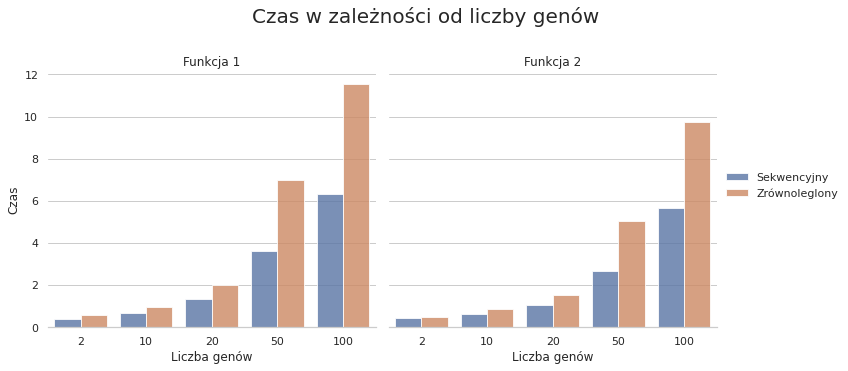

In [44]:
sns.set_theme(style='whitegrid')
g = sns.catplot(data=data,kind='bar',
           x='Liczba genów', y='Czas', hue='Algorytm',
           alpha=0.8, col='Funkcja')
g.despine(left=True)
g.legend.set_title('')
g.set_titles("Funkcja {col_name}")
g.fig.suptitle('Czas w zależności od liczby genów', fontsize=20,
              fontdict={'weight':'bold'})
g.fig.subplots_adjust(top=.8)

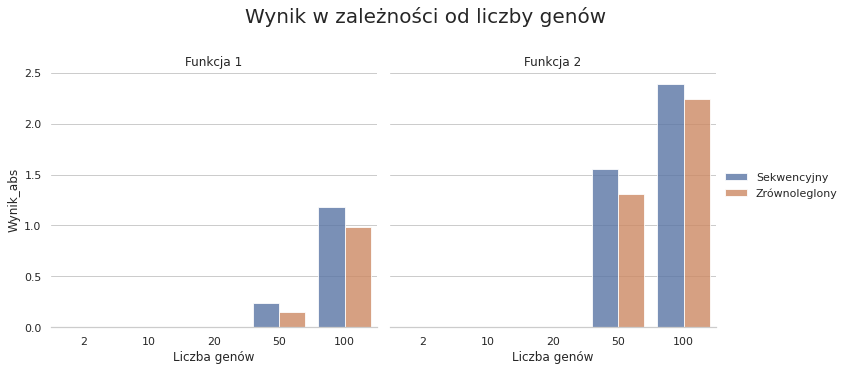

In [50]:
sns.set_theme(style='whitegrid')
g = sns.catplot(data=data,kind='bar',
           x='Liczba genów', y='Wynik_abs', hue='Algorytm',
           alpha=0.8, col='Funkcja')
g.despine(left=True)
g.legend.set_title('')
g.set_titles("Funkcja {col_name}")
g.fig.suptitle('Wynik w zależności od liczby genów', fontsize=20,
              fontdict={'weight':'bold'})
g.fig.subplots_adjust(top=.8)